In [ ]:
from classifier_fit import train_test_clf
import pickle
import pandas as pd

In [65]:
with open(r"D:\GraduationDesign\sms-spam-detector\data\spam_clear.pkl", "rb") as f:
    df = pickle.load(f)

In [66]:
with open(r"D:\GraduationDesign\sms-spam-detector\data\spam_dic.pkl", "rb") as f:
    spam_vecs = pickle.load(f)
with open(r"D:\GraduationDesign\sms-spam-detector\data\spam_label.pkl", "rb") as f:
    spam_labels = pickle.load(f)

In [67]:
from sklearn.model_selection import train_test_split

N_data = 1000
X_train, X_test, y_train, y_test = train_test_split(spam_vecs['BERT'],
                                                    spam_labels,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=1)  # random_state=0每次分割得到不同的数组，1每次得到相同的数组

### 加载调参结果

In [68]:
gs_results_reload = pickle.load(open(r'D:\GraduationDesign\sms-spam-detector\data\gs_results.pkl', "rb"))
print(gs_results_reload.shape)

(7, 4)


In [69]:
# for gs_r in gs_results_reload['GridSearchCV']:
#     # gs_r = row['GridSearchCV']
#     for mean, std, params in zip(gs_r.cv_results_["mean_test_score"], gs_r.cv_results_["std_test_score"],
#                                  gs_r.cv_results_["params"]):
#         print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
#         print()

In [70]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

results_default = pd.DataFrame(columns=['Encoder', 'Classifier', 'Acc', 'BAcc', 'Prec', 'Recall', 'F1'])
classes = [
    GaussianNB(),  # 无参数不需要调参
    SVC(),
    LinearSVC(),
    LogisticRegression(),
    SGDClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(),
]
for clf in classes:
    acc, bacc, prec, recall, f1 = train_test_clf(clf, X_train, y_train, X_test, y_test,
                                                 "[%s %s] " % ('BERT', type(clf).__name__), isShow=False)
    # 记录评估指标
    results_default = results_default.append({'Encoder': 'BERT',
                                              'Classifier': type(clf).__name__,
                                              'Acc': acc,
                                              'BAcc': bacc,
                                              'Prec': prec,
                                              'Recall': recall,
                                              'F1': f1}, ignore_index=True)
print("完成!")

[BERT GaussianNB]                    Balanced accuracy: 97.60%
[BERT SVC]                           Balanced accuracy: 97.94%
[BERT LinearSVC]                     Balanced accuracy: 97.94%
[BERT LogisticRegression]            Balanced accuracy: 96.91%
[BERT SGDClassifier]                 Balanced accuracy: 97.88%
[BERT KNeighborsClassifier]          Balanced accuracy: 97.25%
[BERT MLPClassifier]                 Balanced accuracy: 97.82%
完成!


In [71]:
best_classifier = []
results_best = pd.DataFrame(columns=['Encoder', 'Classifier', 'Acc', 'BAcc', 'Prec', 'Recall', 'F1'])
for search in gs_results_reload['GridSearchCV']:
    # print(search.best_estimator_)
    best_classifier.append(search.best_estimator_)
for clf in best_classifier:
    print(clf)
    acc, bacc, prec, recall, f1 = train_test_clf(clf, X_train, y_train, X_test, y_test,
                                                 "[%s %s] " % ('BERT', type(clf).__name__), isShow=False)
    # 记录评估指标
    results_best = results_best.append({'Encoder': 'BERT',
                                        'Classifier': type(clf).__name__,
                                        'Acc': acc,
                                        'BAcc': bacc,
                                        'Prec': prec,
                                        'Recall': recall,
                                        'F1': f1}, ignore_index=True)
print("完成!")

GaussianNB()
[BERT GaussianNB]                    Balanced accuracy: 97.60%
SVC(C=100.0, gamma=0.1)
[BERT SVC]                           Balanced accuracy: 97.82%
LinearSVC(C=10.0)
[BERT LinearSVC]                     Balanced accuracy: 97.82%
LogisticRegression(C=10.0, class_weight='balanced')
[BERT LogisticRegression]            Balanced accuracy: 98.34%
SGDClassifier(alpha=0.0010000000000000002, class_weight='balanced')
[BERT SGDClassifier]                 Balanced accuracy: 99.20%
KNeighborsClassifier(p=4, weights='distance')
[BERT KNeighborsClassifier]          Balanced accuracy: 98.63%
MLPClassifier(alpha=0.00010000000000000002, hidden_layer_sizes=(100, 30),
              max_iter=100)
[BERT MLPClassifier]                 Balanced accuracy: 97.82%
完成!


In [72]:
results_default

,Encoder,Classifier,Acc,BAcc,Prec,Recall,F1
0,BERT,GaussianNB,99.0%,97.6%,93.9%,95.9%,94.9%
1,BERT,SVC,99.6%,97.9%,100.0%,95.9%,97.9%
2,BERT,LinearSVC,99.6%,97.9%,100.0%,95.9%,97.9%
3,BERT,LogisticRegression,99.4%,96.9%,100.0%,93.8%,96.8%
4,BERT,SGDClassifier,99.5%,97.9%,98.9%,95.9%,97.4%
5,BERT,KNeighborsClassifier,99.2%,97.3%,96.8%,94.8%,95.8%
6,BERT,MLPClassifier,99.4%,97.8%,97.9%,95.9%,96.9%


In [73]:
results_best

,Encoder,Classifier,Acc,BAcc,Prec,Recall,F1
0,BERT,GaussianNB,99.0%,97.6%,93.9%,95.9%,94.9%
1,BERT,SVC,99.4%,97.8%,97.9%,95.9%,96.9%
2,BERT,LinearSVC,99.4%,97.8%,97.9%,95.9%,96.9%
3,BERT,LogisticRegression,99.5%,98.3%,97.9%,96.9%,97.4%
4,BERT,SGDClassifier,99.4%,99.2%,95.0%,99.0%,97.0%
5,BERT,KNeighborsClassifier,99.2%,98.6%,94.1%,97.9%,96.0%
6,BERT,MLPClassifier,99.4%,97.8%,97.9%,95.9%,96.9%


In [74]:
with open(r'D:\GraduationDesign\sms-spam-detector\data\clf_results_default_vs_best.pkl', "wb") as f:
    pickle.dump((results_default, results_best), f)

In [75]:
with open(r'D:\GraduationDesign\sms-spam-detector\data\clf_results_default_vs_best.pkl', "rb") as f:
    results_default_load, results_best_load = pickle.load(f)

In [76]:
import numpy as np

pd.options.display.float_format = '{:,.1%}'.format
pd.options.display.max_rows = None


def display_result(res):
    aggregations = {
        'BAcc': [lambda x: "%.2f%%" % (np.mean(x) * 100)],  # 平均值+-标准差
        'Acc': [lambda x: "%.2f%%" % (np.mean(x) * 100)],
        'Recall': [lambda x: "%.2f%%" % (np.mean(x) * 100)],
        'Prec': [lambda x: "%.2f%%" % (np.mean(x) * 100)],
        'F1': [lambda x: "%.2f%%" % (np.mean(x) * 100)],
    }

    # 打印聚合的统计数据
    display(res.groupby(['Encoder', 'Classifier']).agg(aggregations))

In [77]:
display_result(results_default_load)
display_result(results_best_load)

BAcc      Acc   Recall     Prec       F1
                             <lambda> <lambda> <lambda> <lambda> <lambda>
Encoder Classifier                                                       
BERT    GaussianNB             97.60%   98.97%   95.88%   93.94%   94.90%
        KNeighborsClassifier   97.25%   99.18%   94.85%   96.84%   95.83%
        LinearSVC              97.94%   99.59%   95.88%  100.00%   97.89%
        LogisticRegression     96.91%   99.38%   93.81%  100.00%   96.81%
        MLPClassifier          97.82%   99.38%   95.88%   97.89%   96.88%
        SGDClassifier          97.88%   99.49%   95.88%   98.94%   97.38%
        SVC                    97.94%   99.59%   95.88%  100.00%   97.89%

BAcc      Acc   Recall     Prec       F1
                             <lambda> <lambda> <lambda> <lambda> <lambda>
Encoder Classifier                                                       
BERT    GaussianNB             97.60%   98.97%   95.88%   93.94%   94.90%
        KNeighborsClassifier   98.63%   99.18%   97.94%   94.06%   95.96%
        LinearSVC              97.82%   99.38%   95.88%   97.89%   96.88%
        LogisticRegression     98.34%   99.49%   96.91%   97.92%   97.41%
        MLPClassifier          97.82%   99.38%   95.88%   97.89%   96.88%
        SGDClassifier          99.20%   99.38%   98.97%   95.05%   96.97%
        SVC                    97.82%   99.38%   95.88%   97.89%   96.88%

d:\graduationdesign\sms-spam-detector\sms-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
d:\graduationdesign\sms-spam-detector\sms-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
d:\graduationdesign\sms-spam-detector\sms-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_det_curve is deprecated; Function plot_det_c

Text(0.5, 0.98, 'DET curve comparison')

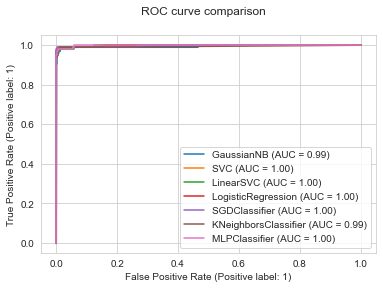

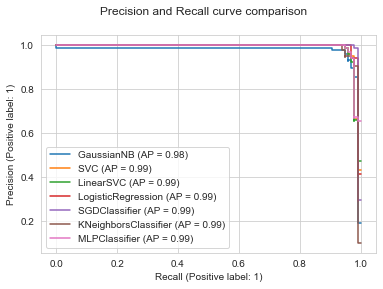

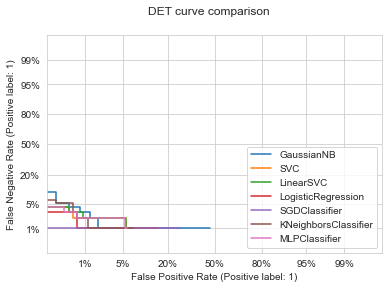

In [88]:
from sklearn import metrics
from sklearn.metrics import plot_precision_recall_curve, plot_det_curve, plot_roc_curve

all_disp_roc = plot_roc_curve(best_classifier[0], X_test, y_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, best_classifier[0].predict(X_test), pos_label=1)
roc_auc = []
roc_auc.append(metrics.auc(fpr, tpr))
# # all_disp_roc.
all_disp_prc = plot_precision_recall_curve(best_classifier[0], X_test, y_test)
all_disp_det = plot_det_curve(best_classifier[0], X_test, y_test) # DET Detective error tradeoff
# 检测错误权衡图（DET）是刻画二分类系统的分类错误率的一种图表，表示错误拒绝率（false reject rate）和错误接受率（false accept rate）之间的关系，x和y轴一般用log坐标轴表示。
for clf in best_classifier[1:]:
    clf_disp_roc = plot_roc_curve(clf, X_test, y_test, ax=all_disp_roc.ax_)
    clf_disp_prc = plot_precision_recall_curve(clf, X_test, y_test, ax=all_disp_prc.ax_)
    clf_disp_det = plot_det_curve(clf, X_test, y_test, ax=all_disp_det.ax_)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, best_classifier[0].predict(X_test), pos_label=1)
    roc_auc.append(metrics.auc(fpr, tpr))
all_disp_roc.figure_.suptitle("ROC curve comparison")
all_disp_prc.figure_.suptitle("Precision and Recall curve comparison")
all_disp_det.figure_.suptitle("DET curve comparison") # 检测误差权衡曲线

### 打印AUC

In [79]:
print(roc_auc)

[0.9759606907334047, 0.9759606907334047, 0.9759606907334047, 0.9759606907334047, 0.9759606907334047, 0.9759606907334047, 0.9759606907334047]


d:\graduationdesign\sms-spam-detector\sms-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
d:\graduationdesign\sms-spam-detector\sms-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
d:\graduationdesign\sms-spam-detector\sms-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated i

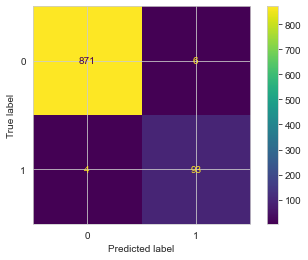

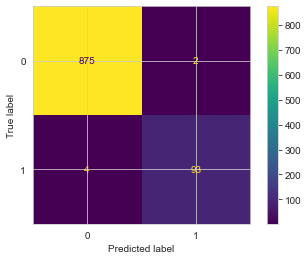

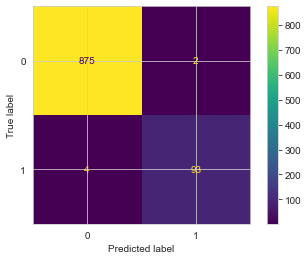

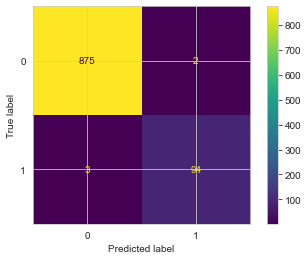

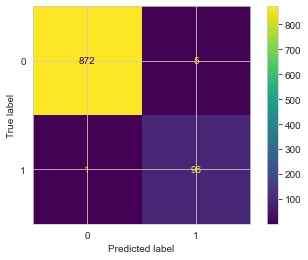

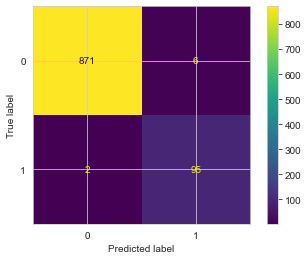

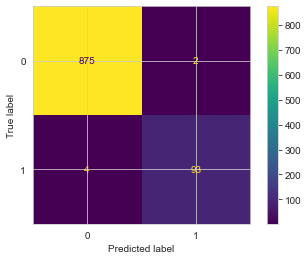

In [80]:
from sklearn.metrics import plot_confusion_matrix

for clf in best_classifier:
    plot_confusion_matrix(clf, X_test, y_test)

In [82]:
import joblib
clf_selected = best_classifier[0]
print('D:\GraduationDesign\sms-spam-detector\saved_model\{}.joblib'.format(type(clf_selected).__name__))
clf_load = joblib.load('D:\GraduationDesign\sms-spam-detector\saved_model\{}.joblib'.format(type(clf_selected).__name__))

D:\GraduationDesign\sms-spam-detector\saved_model\GaussianNB.joblib


In [83]:
# clf_load = joblib.load('D:\GraduationDesign\sms-spam-detector\saved_model\pipe.joblib')

In [84]:
input_content = [
    'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
    'I HAVE A DATE ON SUNDAY WITH WILL!!',
    'XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL',
    "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
    'For fear of fainting with the of all that housework you just did? Quick have a cuppa',
]
# spam, ham, spam, ham, ham

In [85]:
from encoders import BertVectorizer
bert = BertVectorizer()

In [86]:
predict = clf_load.predict(bert.fit_transform(input_content))



使用BERT模型编码中... 
.   0
....

In [87]:
print(predict)

[1 0 1 0 0]
